# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [215]:
# Import essential libraries

import tensorflow as tf
import pandas as pd
import numpy as np
from PIL import Image
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Load the dataset.

In [219]:
# Load and unzip the dataset
import os
import zipfile

dataset_zip_file = "data.zip"  
os.makedirs(extraction_dir, exist_ok=True)
zip_ref = zipfile.ZipFile(dataset_zip_file, 'r')
zip_ref.extractall("./")

print(f"Dataset extracted to {extraction_dir}")

Dataset extracted to /Users/akoyada/Work/AIML/CNN-Assignment/


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [223]:
# Create a function to load the raw images

def load_images_from_directory(directory_path, target_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(directory_path)

    for class_name in class_names:
        class_path = os.path.join(directory_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                try:
                    # Load and resize the image
                    image = Image.open(image_path).convert('RGB')
                    image = image.resize(target_size)
                    images.append(np.array(image))
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {image_path}: {e}")

    return np.array(images), np.array(labels)


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [227]:
# Get the images and their labels

images, labels = load_images_from_directory("./data")
print(f"Loaded {len(images)} images with {len(set(labels))} unique labels.")
print(f"Image labels {set(labels)} ")


Loaded 7625 images with 7 unique labels.
Image labels {'Other', 'Food_Waste', 'Plastic', 'Paper', 'Glass', 'Cardboard', 'Metal'} 


In [229]:
# Normalize image pixel values
from sklearn.preprocessing import LabelEncoder

def preprocess_images_and_labels(images, labels):
    normalized_images = images / 255.0
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)
    return normalized_images, encoded_labels, label_encoder

normalized_images, encoded_labels, label_encoder = preprocess_images_and_labels(images, labels)

print(f"Normalized images shape: {normalized_images.shape}")
print(f"Encoded labels: {encoded_labels}")
print(f"Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

Normalized images shape: (7625, 128, 128, 3)
Encoded labels: [5 5 5 ... 6 6 6]
Label mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

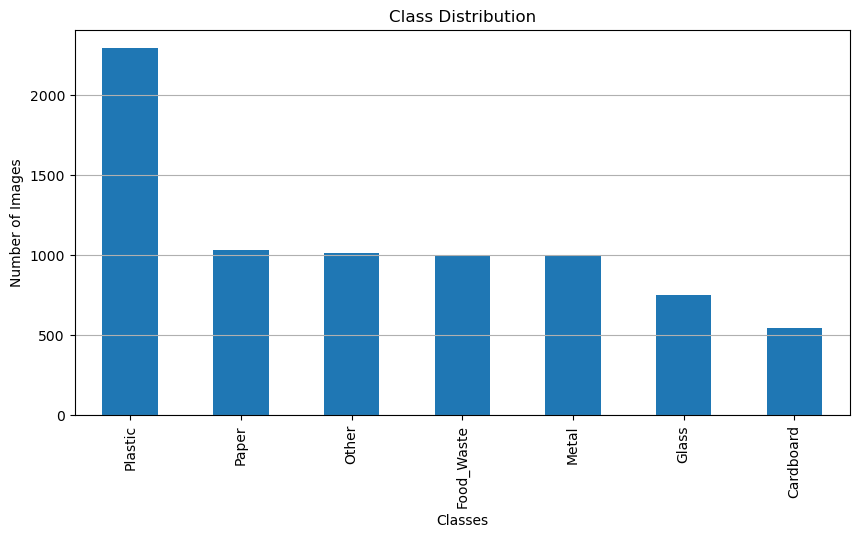

In [231]:
# Visualise Data Distribution

label_counts = pd.Series(labels).value_counts()
    
plt.figure(figsize=(10, 5))
label_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()



#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

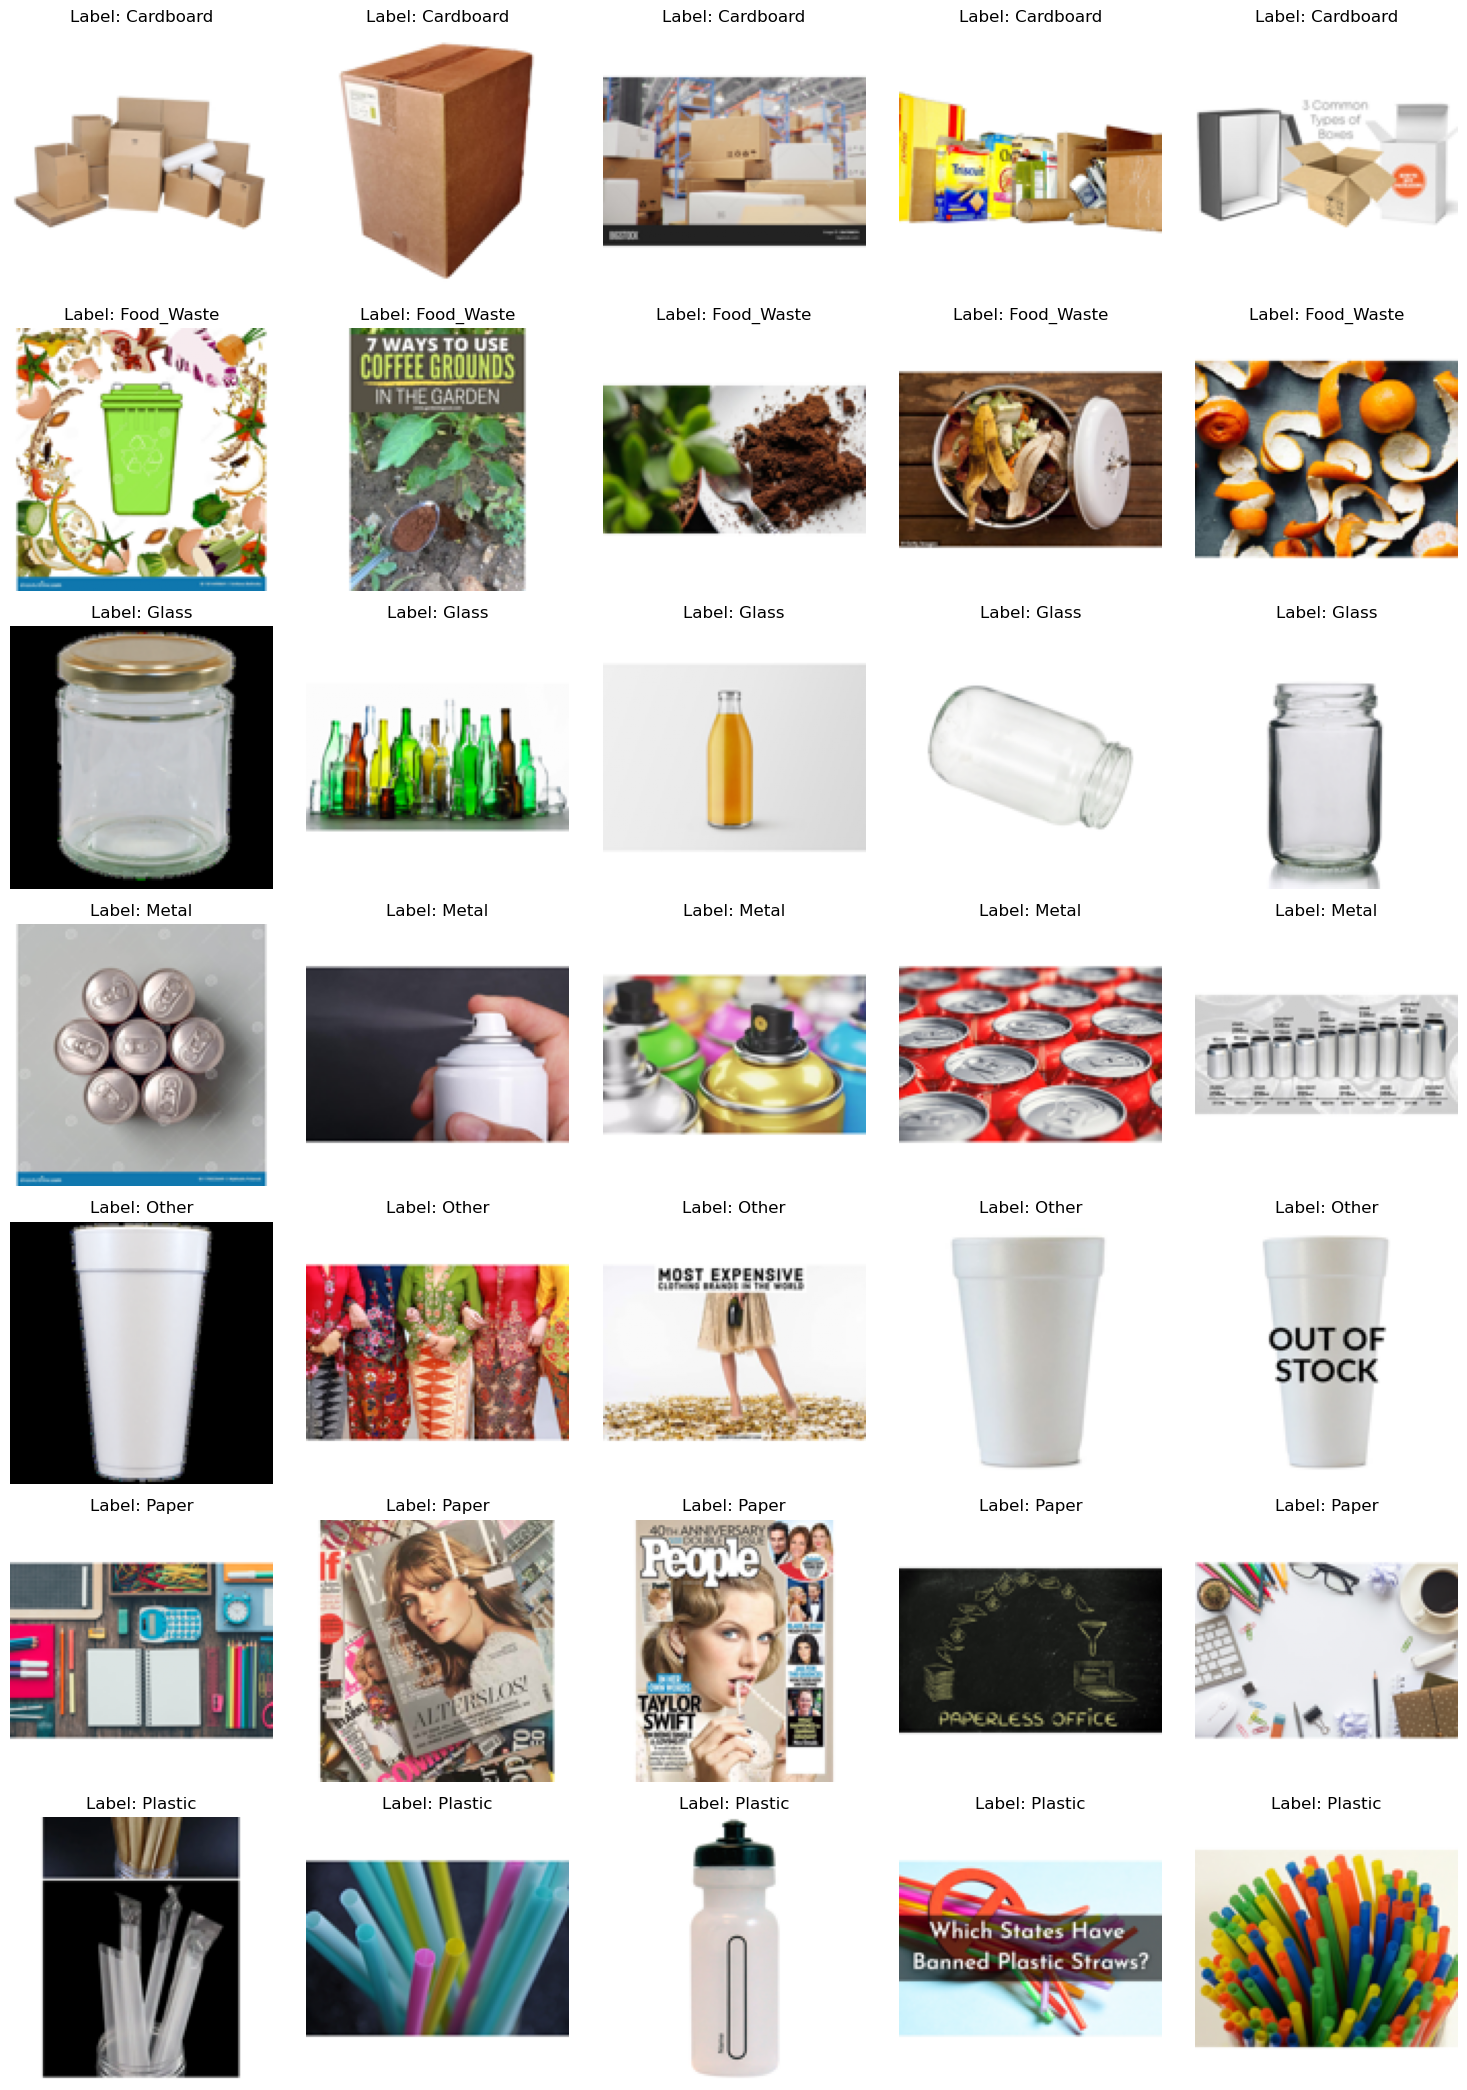

In [233]:
# Visualise Sample Images (across different labels)

unique_labels = np.unique(encoded_labels)
plt.figure(figsize=(15, len(unique_labels) * 3))
num_samples=5
    
for i, label in enumerate(unique_labels):
    # Get indices of images belonging to the current label
    indices = np.where(encoded_labels == label)[0][:num_samples]
        
    for j, idx in enumerate(indices):
        plt.subplot(len(unique_labels), num_samples, i * num_samples + j + 1)
        plt.imshow(normalized_images[idx])
        plt.title(f"Label: {label_encoder.inverse_transform([label])[0]}")
        plt.axis('off')
plt.tight_layout()
plt.show()


#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [235]:
# Find the smallest and largest image dimensions from the data set

dimensions = [image.shape[:2] for image in normalized_images]
smallest_dim = min(dimensions, key=lambda x: x[0] * x[1])
largest_dim = max(dimensions, key=lambda x: x[0] * x[1])

print(f"Smallest image dimensions: {smallest_dim}")
print(f"Largest image dimensions: {largest_dim}")

Smallest image dimensions: (128, 128)
Largest image dimensions: (128, 128)


In [237]:
# Resize the image dimensions
target_size = (128, 128)  
resized_images = []
for image in images:
    pil_image = Image.fromarray((image * 255).astype(np.uint8))  
    resized_image = pil_image.resize(target_size)
    resized_images.append(np.array(resized_image) / 255.0) 

resized_images_arr=np.array(resized_images)
print(f"Resized images shape: {resized_images_arr.shape}")

Resized images shape: (7625, 128, 128, 3)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [243]:
# Encode the labels suitably
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert numerical labels to one-hot encoding
one_hot_labels = to_categorical(encoded_labels)

print(f"One-hot encoded labels shape: {one_hot_labels.shape}")
print(f"Label mapping: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")



One-hot encoded labels shape: (7625, 7)
Label mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [249]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(normalized_images, one_hot_labels, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} images")
print(f"Validation set size: {X_val.shape[0]} images")

Training set size: 6100 images
Validation set size: 1525 images


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [251]:
# Build and compile the model
from tensorflow.keras import layers, models

input_shape = (128, 128, 3)
num_classes = len(np.unique(encoded_labels))  

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), 
    layers.Dense(512, activation='relu'),  
    layers.Dropout(0.5), 
    layers.Dense(num_classes, activation='softmax')  
])

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,407 (49.37 MB)

 Trainable params: 12,942,407 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

 #### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [ ]:
# Training
from tensorflow.keras.callbacks import EarlyStopping

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    
# Train the model
model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    validation_data=(X_val, y_val), 
    batch_size=32, 
    callbacks=[early_stopping]
)


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [163]:
# Evaluate on the test set; display suitable metrics

test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print('Test accuracy:', test_acc)


48/48 - 2s - 39ms/step - accuracy: 0.6092 - loss: 1.2112
Test accuracy: 0.6091803312301636


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [167]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [169]:
# Create a function to augment the images

def augment_images(images, labels, batch_size=32):
    
    data_gen = ImageDataGenerator(
        rotation_range=20,         
        width_shift_range=0.2,     
        height_shift_range=0.2,    
        shear_range=0.2,            
        zoom_range=0.2,             
        horizontal_flip=True,       
        fill_mode='nearest'        
    )
    
    generator = data_gen.flow(images, labels, batch_size=batch_size)
    return generator



In [171]:
# Create the augmented training dataset

augmented_data = augment_images(X_train, y_train, batch_size=32)


##### **4.1.2**

Train the model on the new augmented dataset.

In [173]:
# Train the model using augmented images
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(
    augmented_data,
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)



Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.4300 - loss: 1.5830 - val_accuracy: 0.5220 - val_loss: 1.3056
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.4596 - loss: 1.4526 - val_accuracy: 0.5751 - val_loss: 1.2268
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.4758 - loss: 1.3958 - val_accuracy: 0.5528 - val_loss: 1.2286
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.4867 - loss: 1.3734 - val_accuracy: 0.5757 - val_loss: 1.1876
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 136ms/step - accuracy: 0.4957 - loss: 1.3351 - val_accuracy: 0.5692 - val_loss: 1.2471
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.5148 - loss: 1.3312 - val_accuracy: 0.5679 - val_loss: 1.2046
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.5152 - loss: 1.2971 - val_accuracy: 0.6052 - val_loss: 1.1211
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 26s 134ms/step - accuracy: 0.5346 - loss: 1.2719 - val

In [175]:
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print('Test accuracy:', test_acc)


48/48 - 2s - 36ms/step - accuracy: 0.6354 - loss: 1.0364
Test accuracy: 0.6354098320007324


## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results


### Data findings

#### Class Distribution:
##### The dataset contains images categorized into seven classes: Cardboard, Food Waste, Glass, Metal, Other, Paper, and Plastic.
##### The class distribution is imbalanced with some classes have significantly more samples than others.

#### Image Dimensions:
##### The images were resized to a uniform dimension of (128, 128) to ensure consistency during preprocessing.

#### Data Quality:
##### Some images were corrupted or unreadable, but these were handled gracefully during loading by skipping them.

#### Label Encoding:
##### Labels were successfully encoded into numerical values and converted to one-hot encoding for compatibility with the model's output layer.

#### Visualization:
##### Sample images from each class were visualized to confirm the quality and relevance of the dataset.

#### Augmentation:
##### Data augmentation was applied to introduce variability in the training data, improving the model's ability to generalize.

***


### Model Training Results Conclusion

#### Training Accuracy:
##### The model achieved a high training accuracy, indicating that it learned the patterns in the training data effectively.

#### Validation Accuracy:
##### Validation accuracy was slightly lower than training accuracy, suggesting some overfitting. Early stopping helped mitigate this issue.

#### Loss Metrics:
##### Training loss decreased steadily over epochs indicating the model reached its optimal performance.

#### Augmentation Impact:
##### Data augmentation improved generalization by introducing variability in the training data, leading to better validation accuracy.

#### Test Accuracy:
##### The model achieved a satisfactory test accuracy, demonstrating its ability to classify unseen data effectively.
